In [35]:
import pandas as pd
import math
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
import pylab
import sklearn as sk
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras as kr
from keras.models import Sequential
from keras.layers import InputLayer, Input
from keras.layers import Reshape, MaxPooling2D
from keras.layers import Conv2D, Dense, Flatten, Dropout
from keras import optimizers
from keras.layers import Dense, Activation
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping
from keras.layers.advanced_activations import PReLU
from tensorflow.keras.layers import BatchNormalization
import seaborn as sns
from livelossplot import PlotLossesKeras


print('Using matplotlib version', matplotlib.__version__)
print('Using sklearn version', sk.__version__)
print('Using tensorflow version', tf.__version__)
print('Using keras version', kr.__version__)

import socket
my_hostname=socket.gethostbyaddr(socket.gethostname())[0]
print('You are running on ', my_hostname)

Using matplotlib version 3.1.0
Using sklearn version 0.21.2
Using tensorflow version 1.13.1
Using keras version 2.2.4
You are running on  dhcp177.ba.infn.it


In [36]:
import os

which_year = '2016'
which_final_state = '2lss'


if which_year == '2016':

    idir = 'newVariables_DeltaR_MET_all_jets_splitted' #only_ss 0.72 #if 'cism.ucl.be' in my_hostname else 'inputs/2016_skimmed_drll_fixthefix_skimmed_v2'
    files_tth = [i for i in os.listdir(idir) if '.csv' in i and 'TTHnobb_fxfx_Friend' in i]
    files_ttv = [i for i in os.listdir(idir) if '.csv' in i and ('TTZ' in i or 'TTW' in i )]
    files_tt =  [i for i in os.listdir(idir) if '.csv' in i and 'TTJets' in i]


if which_year == '2017':

    idir = 'dummy' #only_ss 0.72 #if 'cism.ucl.be' in my_hostname else 'inputs/2016_skimmed_drll_fixthefix_skimmed_v2'
    files_tth = [i for i in os.listdir(idir) if '.csv' in i and 'TTHnobb_fxfx_Friend' in i]
    files_ttv = [i for i in os.listdir(idir) if '.csv' in i and ('TTZ' in i or 'TTW' in i )]
    files_tt =  [i for i in os.listdir(idir) if '.csv' in i and 'TTJets' in i]  

if which_year == '2018':

    idir = 'newVariables_DeltaR_MET_all_jets_splitted' #only_ss 0.72 #if 'cism.ucl.be' in my_hostname else 'inputs/2016_skimmed_drll_fixthefix_skimmed_v2'
    files_tth = [i for i in os.listdir(idir) if '.csv' in i and 'TTHnobb_fxfx_Friend' in i]
    files_ttv = [i for i in os.listdir(idir) if '.csv' in i and ('TTZ' in i or 'TTW' in i )]
    files_tt =  [i for i in os.listdir(idir) if '.csv' in i and 'TTJets' in i]  

if which_year == 'RunII':

    idir = 'newVariables_DeltaR_MET_all_jets_splitted' #only_ss 0.72 #if 'cism.ucl.be' in my_hostname else 'inputs/2016_skimmed_drll_fixthefix_skimmed_v2'
    files_tth = [i for i in os.listdir(idir) if '.csv' in i and 'TTHnobb_fxfx_Friend' in i]
    files_ttv = [i for i in os.listdir(idir) if '.csv' in i and ('TTZ' in i or 'TTW' in i )]
    files_tt =  [i for i in os.listdir(idir) if '.csv' in i and 'TTJets' in i]  

if which_year == '2017_2018':

    idir = 'newVariables_DeltaR_MET_all_jets_splitted' #only_ss 0.72 #if 'cism.ucl.be' in my_hostname else 'inputs/2016_skimmed_drll_fixthefix_skimmed_v2'
    files_tth = [i for i in os.listdir(idir) if '.csv' in i and 'TTHnobb_fxfx_Friend' in i]
    files_ttv = [i for i in os.listdir(idir) if '.csv' in i and ('TTZ' in i or 'TTW' in i )]
    files_tt =  [i for i in os.listdir(idir) if '.csv' in i and 'TTJets' in i]  

    
print('TTH files:', files_tth)
print('TTV files:', files_ttv)
print('TT  files:', files_tt )

data_tth = pd.concat([ pd.read_csv('{idir}/{ifile}'.format(idir=idir,ifile=ifile)) for ifile in files_tth], ignore_index=True)
bkgs=False
data_ttv = None
data_tt = None
if bkgs:
    data_ttv = pd.concat([ pd.read_csv('{idir}/{ifile}'.format(idir=idir,ifile=ifile)) for ifile in files_ttv], ignore_index=True)
    data_tt = pd.concat([ pd.read_csv('{idir}/{ifile}'.format(idir=idir,ifile=ifile)) for ifile in files_tt], ignore_index=True)

print(len(data_tth))
data_tth.head()

TTH files: ['TTHnobb_fxfx_Friend.csv']
TTV files: []
TT  files: []
151349


,Hreco_nLeps,Hreco_nJets,Hreco_Lep0_pt,Hreco_Lep0_eta,Hreco_Lep0_phi,Hreco_Lep0_mass,Hreco_Lep1_pt,Hreco_Lep1_eta,Hreco_Lep1_phi,Hreco_Lep1_mass,...,Hreco_All5_Jets_eta,Hreco_All5_Jets_phi,Hreco_All5_Jets_mass,Hreco_Met_calc_pt,Hreco_Met_calc_eta,Hreco_Met_calc_phi,Hreco_Met_calc_mass,Hreco_Hgen_vis_pt,Hreco_Hgen_tru_pt,Hreco_evt_tag
0,3,5,216.696610,1.152832,-1.878906,0.105713,115.671910,-0.054596,0.758911,-0.013145,...,2.051813,2.842636,473.67640,90.565260,-2.298445,1.468018,0.000005,-99.00000,-99.000000,143.0
1,2,8,39.632477,-1.533447,-1.924560,0.016907,54.046158,-0.586060,-0.373108,-0.004211,...,-2.634364,-2.618360,556.03204,27.807750,4.151904,0.073990,0.000000,-99.00000,-99.000000,121.0
2,2,4,85.495810,-0.427185,-0.665771,-0.030975,55.812530,-0.643921,1.863281,0.105713,...,-2.322567,-2.610679,465.24402,35.686523,3.187898,-0.213287,0.000000,22.19012,9.623851,143.0
3,2,4,51.678165,-0.693359,3.014160,0.021652,43.507114,-1.205566,-1.343506,0.105713,...,-0.862706,-0.076974,203.19673,70.115780,1.482299,-1.069580,-0.000002,238.85837,274.430630,143.0
4,2,7,37.979683,0.879272,1.810303,0.105713,28.506662,-1.830078,2.865234,0.105713,...,-0.948970,1.616357,440.03647,89.059010,1.793224,-2.018066,-0.000004,-99.00000,-99.000000,169.0


In [9]:
event_tails = True
if event_tails:

    data_tth_more_data = data_tth.append(data_tth.loc[data_tth['Hreco_HTXS_Higgs_pt'] > 200])
    data_tth_more_data = data_tth_more_data.append(data_tth.loc[data_tth['Hreco_HTXS_Higgs_pt'] > 200])
    print(len(data_tth))
    print(len(data_tth_more_data))

151349
209145


In [32]:
    
data_tth["Hreco_STXS_PT_Bin"] = -1

for lab in ['HTXS_Higgs', 'met_phi', 'HadTop', 'Lep0', 'Lep1', 'Jet0', 'Jet1', 'Jet2', 'Jet3', 'Jet4', 'Jets_plus_Lep', 'More5_Jets', 'All5_Jets', 'met']:
#regression gen
    if(str(lab) is 'met'):
        print('in if')
        string = str('Hreco_'+lab)
        data_tth.loc[data_tth[string]<= 60, 'Hreco_'+lab+'_Bin'] = 1
        data_tth.loc[(data_tth[string] > 60.) & (data_tth[string] <= 120.) , 'Hreco_'+lab+'_Bin'] = 2
        data_tth.loc[(data_tth[string] > 120.) & (data_tth[string] <= 200.) , 'Hreco_'+lab+'_Bin'] = 3
        data_tth.loc[(data_tth[string] > 200.) & (data_tth[string] <= 300.) , 'Hreco_'+lab+'_Bin'] = 4
        data_tth.loc[(data_tth[string] > 300.) & (data_tth[string] <= 450.) , 'Hreco_'+lab+'_Bin'] = 5
        data_tth.loc[(data_tth[string] > 450.) , 'Hreco_'+lab+'_Bin'] = 6
    elif(str(lab) is not 'HTXS_Higgs' and str(lab) is not 'met_phi'):
        string = str('Hreco_'+lab+'_pt')
        data_tth.loc[data_tth[string]<= 60, 'Hreco_'+lab+'_pt_Bin'] = 1
        data_tth.loc[(data_tth[string] > 60.) & (data_tth[string] <= 120.) , 'Hreco_'+lab+'_pt_Bin'] = 2
        data_tth.loc[(data_tth[string] > 120.) & (data_tth[string] <= 200.) , 'Hreco_'+lab+'_pt_Bin'] = 3
        data_tth.loc[(data_tth[string] > 200.) & (data_tth[string] <= 300.) , 'Hreco_'+lab+'_pt_Bin'] = 4
        data_tth.loc[(data_tth[string] > 300.) & (data_tth[string] <= 450.) , 'Hreco_'+lab+'_pt_Bin'] = 5
        data_tth.loc[(data_tth[string] > 450.) , 'Hreco_'+lab+'_pt_Bin'] = 6
        
        string = str('Hreco_'+lab+'_mass')
        data_tth.loc[data_tth[string]<= 60, 'Hreco_'+lab+'_mass_Bin'] = 1
        data_tth.loc[(data_tth[string] > 60.) & (data_tth[string] <= 120.) , 'Hreco_'+lab+'_mass_Bin'] = 2
        data_tth.loc[(data_tth[string] > 120.) & (data_tth[string] <= 200.) , 'Hreco_'+lab+'_mass_Bin'] = 3
        data_tth.loc[(data_tth[string] > 200.) & (data_tth[string] <= 300.) , 'Hreco_'+lab+'_mass_Bin'] = 4
        data_tth.loc[(data_tth[string] > 300.) & (data_tth[string] <= 450.) , 'Hreco_'+lab+'_mass_Bin'] = 5
        data_tth.loc[(data_tth[string] > 450.) , 'Hreco_'+lab+'_mass_Bin'] = 6     
        
        string = str('Hreco_'+lab+'_eta')
        data_tth.loc[data_tth[string]<= -6, 'Hreco_'+lab+'_eta_Bin'] = 1
        data_tth.loc[(data_tth[string] > -6.) & (data_tth[string] <= -3.) , 'Hreco_'+lab+'_eta_Bin'] = 2
        data_tth.loc[(data_tth[string] > -3.) & (data_tth[string] <= -0.9) , 'Hreco_'+lab+'_eta_Bin'] = 3
        data_tth.loc[(data_tth[string] > -0.9) & (data_tth[string] <= 0.9) , 'Hreco_'+lab+'_eta_Bin'] = 4
        data_tth.loc[(data_tth[string] > 0.9) & (data_tth[string] <= 3) , 'Hreco_'+lab+'_eta_Bin'] = 5
        data_tth.loc[(data_tth[string] > 3) , 'Hreco_'+lab+'_eta_Bin'] = 6  
        
        string = str('Hreco_'+lab+'_phi')
        data_tth.loc[data_tth[string]<= -6, 'Hreco_'+lab+'_phi_Bin'] = 1
        data_tth.loc[(data_tth[string] > -6.) & (data_tth[string] <= -3.) , 'Hreco_'+lab+'_phi_Bin'] = 2
        data_tth.loc[(data_tth[string] > -3.) & (data_tth[string] <= -0.9) , 'Hreco_'+lab+'_phi_Bin'] = 3
        data_tth.loc[(data_tth[string] > -0.9) & (data_tth[string] <= 0.9) , 'Hreco_'+lab+'_phi_Bin'] = 4
        data_tth.loc[(data_tth[string] > 0.9) & (data_tth[string] <= 3) , 'Hreco_'+lab+'_phi_Bin'] = 5
        data_tth.loc[(data_tth[string] > 3) , 'Hreco_'+lab+'_phi_Bin'] = 6  
    
    elif(str(lab) is 'HTXS_Higgs'):
        string = str('Hreco_'+lab+'_pt')
        data_tth.loc[data_tth[string]<= 60, 'Hreco_'+lab+'_pt_Bin'] = 1
        data_tth.loc[(data_tth[string] > 60.) & (data_tth[string] <= 120.) , 'Hreco_'+lab+'_pt_Bin'] = 2
        data_tth.loc[(data_tth[string] > 120.) & (data_tth[string] <= 200.) , 'Hreco_'+lab+'_pt_Bin'] = 3
        data_tth.loc[(data_tth[string] > 200.) & (data_tth[string] <= 300.) , 'Hreco_'+lab+'_pt_Bin'] = 4
        data_tth.loc[(data_tth[string] > 300.) & (data_tth[string] <= 450.) , 'Hreco_'+lab+'_pt_Bin'] = 5
        data_tth.loc[(data_tth[string] > 450.) , 'Hreco_'+lab+'_pt_Bin'] = 6
    elif(str(lab) is 'met_phi'):
        string = str('Hreco_'+lab)
        data_tth.loc[data_tth[string]<= -6, 'Hreco_'+lab+'_Bin'] = 1
        data_tth.loc[(data_tth[string] > -6.) & (data_tth[string] <= -3.) , 'Hreco_'+lab+'_Bin'] = 2
        data_tth.loc[(data_tth[string] > -3.) & (data_tth[string] <= -0.9) , 'Hreco_'+lab+'_Bin'] = 3
        data_tth.loc[(data_tth[string] > -0.9) & (data_tth[string] <= 0.9) , 'Hreco_'+lab+'_Bin'] = 4
        data_tth.loc[(data_tth[string] > 0.9) & (data_tth[string] <= 3) , 'Hreco_'+lab+'_Bin'] = 5
        data_tth.loc[(data_tth[string] > 3) , 'Hreco_'+lab+'_Bin'] = 6   

        
#weird name variables

for lab in ['ClosestJetToLep']:
        string = str('Hreco_'+lab+'_pt0')
        data_tth.loc[data_tth[string]<= 60, 'Hreco_'+lab+'_pt0_Bin'] = 1
        data_tth.loc[(data_tth[string] > 60.) & (data_tth[string] <= 120.) , 'Hreco_'+lab+'_pt0_Bin'] = 2
        data_tth.loc[(data_tth[string] > 120.) & (data_tth[string] <= 200.) , 'Hreco_'+lab+'_pt0_Bin'] = 3
        data_tth.loc[(data_tth[string] > 200.) & (data_tth[string] <= 300.) , 'Hreco_'+lab+'_pt0_Bin'] = 4
        data_tth.loc[(data_tth[string] > 300.) & (data_tth[string] <= 450.) , 'Hreco_'+lab+'_pt0_Bin'] = 5
        data_tth.loc[(data_tth[string] > 450.) , 'Hreco_'+lab+'_pt0_Bin'] = 6
        
        string = str('Hreco_'+lab+'_pt1')
        data_tth.loc[data_tth[string]<= 60, 'Hreco_'+lab+'_pt1_Bin'] = 1
        data_tth.loc[(data_tth[string] > 60.) & (data_tth[string] <= 120.) , 'Hreco_'+lab+'_pt1_Bin'] = 2
        data_tth.loc[(data_tth[string] > 120.) & (data_tth[string] <= 200.) , 'Hreco_'+lab+'_pt1_Bin'] = 3
        data_tth.loc[(data_tth[string] > 200.) & (data_tth[string] <= 300.) , 'Hreco_'+lab+'_pt1_Bin'] = 4
        data_tth.loc[(data_tth[string] > 300.) & (data_tth[string] <= 450.) , 'Hreco_'+lab+'_pt1_Bin'] = 5
        data_tth.loc[(data_tth[string] > 450.) , 'Hreco_'+lab+'_pt1_Bin'] = 6

        string = str('Hreco_'+lab+'_mass0')
        data_tth.loc[data_tth[string]<= 60, 'Hreco_'+lab+'_mass0_Bin'] = 1
        data_tth.loc[(data_tth[string] > 60.) & (data_tth[string] <= 120.) , 'Hreco_'+lab+'_mass0_Bin'] = 2
        data_tth.loc[(data_tth[string] > 120.) & (data_tth[string] <= 200.) , 'Hreco_'+lab+'_mass0_Bin'] = 3
        data_tth.loc[(data_tth[string] > 200.) & (data_tth[string] <= 300.) , 'Hreco_'+lab+'_mass0_Bin'] = 4
        data_tth.loc[(data_tth[string] > 300.) & (data_tth[string] <= 450.) , 'Hreco_'+lab+'_mass0_Bin'] = 5
        data_tth.loc[(data_tth[string] > 450.) , 'Hreco_'+lab+'_mass0_Bin'] = 6
        
        string = str('Hreco_'+lab+'_mass1')
        data_tth.loc[data_tth[string]<= 60, 'Hreco_'+lab+'_mass1_Bin'] = 1
        data_tth.loc[(data_tth[string] > 60.) & (data_tth[string] <= 120.) , 'Hreco_'+lab+'_mass1_Bin'] = 2
        data_tth.loc[(data_tth[string] > 120.) & (data_tth[string] <= 200.) , 'Hreco_'+lab+'_mass1_Bin'] = 3
        data_tth.loc[(data_tth[string] > 200.) & (data_tth[string] <= 300.) , 'Hreco_'+lab+'_mass1_Bin'] = 4
        data_tth.loc[(data_tth[string] > 300.) & (data_tth[string] <= 450.) , 'Hreco_'+lab+'_mass1_Bin'] = 5
        data_tth.loc[(data_tth[string] > 450.) , 'Hreco_'+lab+'_mass1_Bin'] = 6
        
        string = str('Hreco_'+lab+'_eta0')
        data_tth.loc[data_tth[string]<= -6, 'Hreco_'+lab+'_eta0_Bin'] = 1
        data_tth.loc[(data_tth[string] > -6.) & (data_tth[string] <= -3.) , 'Hreco_'+lab+'_eta0_Bin'] = 2
        data_tth.loc[(data_tth[string] > -3.) & (data_tth[string] <= -0.9) , 'Hreco_'+lab+'_eta0_Bin'] = 3
        data_tth.loc[(data_tth[string] > -0.9) & (data_tth[string] <= 0.9) , 'Hreco_'+lab+'_eta0_Bin'] = 4
        data_tth.loc[(data_tth[string] > 0.9) & (data_tth[string] <= 3) , 'Hreco_'+lab+'_eta0_Bin'] = 5
        data_tth.loc[(data_tth[string] > 3) , 'Hreco_'+lab+'_eta0_Bin'] = 6
        
        string = str('Hreco_'+lab+'_eta1')
        data_tth.loc[data_tth[string]<= -6, 'Hreco_'+lab+'_eta1_Bin'] = 1
        data_tth.loc[(data_tth[string] > -6.) & (data_tth[string] <= -3.) , 'Hreco_'+lab+'_eta1_Bin'] = 2
        data_tth.loc[(data_tth[string] > -3.) & (data_tth[string] <= -0.9) , 'Hreco_'+lab+'_eta1_Bin'] = 3
        data_tth.loc[(data_tth[string] > -0.9) & (data_tth[string] <= 0.9) , 'Hreco_'+lab+'_eta1_Bin'] = 4
        data_tth.loc[(data_tth[string] > 0.9) & (data_tth[string] <= 3) , 'Hreco_'+lab+'_eta1_Bin'] = 5
        data_tth.loc[(data_tth[string] > 3) , 'Hreco_'+lab+'_eta1_Bin'] = 6
        
        string = str('Hreco_'+lab+'_phi0')
        data_tth.loc[data_tth[string]<= -6, 'Hreco_'+lab+'_phi0_Bin'] = 1
        data_tth.loc[(data_tth[string] > -6.) & (data_tth[string] <= -3.) , 'Hreco_'+lab+'_phi0_Bin'] = 2
        data_tth.loc[(data_tth[string] > -3.) & (data_tth[string] <= -0.9) , 'Hreco_'+lab+'_phi0_Bin'] = 3
        data_tth.loc[(data_tth[string] > -0.9) & (data_tth[string] <= 0.9) , 'Hreco_'+lab+'_phi0_Bin'] = 4
        data_tth.loc[(data_tth[string] > 0.9) & (data_tth[string] <= 3) , 'Hreco_'+lab+'_phi0_Bin'] = 5
        data_tth.loc[(data_tth[string] > 3) , 'Hreco_'+lab+'_phi0_Bin'] = 6
        
        string = str('Hreco_'+lab+'_phi1')
        data_tth.loc[data_tth[string]<= -6, 'Hreco_'+lab+'_phi1_Bin'] = 1
        data_tth.loc[(data_tth[string] > -6.) & (data_tth[string] <= -3.) , 'Hreco_'+lab+'_phi1_Bin'] = 2
        data_tth.loc[(data_tth[string] > -3.) & (data_tth[string] <= -0.9) , 'Hreco_'+lab+'_phi1_Bin'] = 3
        data_tth.loc[(data_tth[string] > -0.9) & (data_tth[string] <= 0.9) , 'Hreco_'+lab+'_phi1_Bin'] = 4
        data_tth.loc[(data_tth[string] > 0.9) & (data_tth[string] <= 3) , 'Hreco_'+lab+'_phi1_Bin'] = 5
        data_tth.loc[(data_tth[string] > 3) , 'Hreco_'+lab+'_phi1_Bin'] = 6

        
for lab in ['DeltaRClosestJetToLep0', 'DeltaRClosestJetToLep1']:
        string = str('Hreco_'+lab)
        data_tth.loc[data_tth[string]<= 0, 'Hreco_'+lab+'_Bin'] = 1
        data_tth.loc[(data_tth[string] > 0.) & (data_tth[string] <= 2.) , 'Hreco_'+lab+'_Bin'] = 2
        data_tth.loc[(data_tth[string] > 2) & (data_tth[string] <= 4) , 'Hreco_'+lab+'_Bin'] = 3
        data_tth.loc[(data_tth[string] > 4) & (data_tth[string] <= 6) , 'Hreco_'+lab+'_Bin'] = 4
        data_tth.loc[(data_tth[string] > 6) & (data_tth[string] <= 8) , 'Hreco_'+lab+'_Bin'] = 5
        data_tth.loc[(data_tth[string] > 8) , 'Hreco_'+lab+'_Bin'] = 6

for lab in ['DeltaPtClosestJetToLep0', 'DeltaPtClosestJetToLep1']:
        string = str('Hreco_'+lab)
        data_tth.loc[data_tth[string]<= 60, 'Hreco_'+lab+'_Bin'] = 1
        data_tth.loc[(data_tth[string] > 60.) & (data_tth[string] <= 120.) , 'Hreco_'+lab+'_Bin'] = 2
        data_tth.loc[(data_tth[string] > 120.) & (data_tth[string] <= 200.) , 'Hreco_'+lab+'_Bin'] = 3
        data_tth.loc[(data_tth[string] > 200.) & (data_tth[string] <= 300.) , 'Hreco_'+lab+'_Bin'] = 4
        data_tth.loc[(data_tth[string] > 300.) & (data_tth[string] <= 450.) , 'Hreco_'+lab+'_Bin'] = 5
        data_tth.loc[(data_tth[string] > 450.) , 'Hreco_'+lab+'_Bin'] = 6
        
for lab in ['TopScore', 'Jet0_isbtagged', 'Jet1_isbtagged', 'Jet2_isbtagged', 'Jet3_isbtagged', 'Jet4_isbtagged']:
        string = str('Hreco_'+lab)
        data_tth.loc[data_tth[string]<= 0, 'Hreco_'+lab+'_Bin'] = 1
        data_tth.loc[(data_tth[string] > 0.) & (data_tth[string] <= 0.2) , 'Hreco_'+lab+'_Bin'] = 2
        data_tth.loc[(data_tth[string] > 0.2) & (data_tth[string] <= 0.4) , 'Hreco_'+lab+'_Bin'] = 3
        data_tth.loc[(data_tth[string] > 0.4) & (data_tth[string] <= 0.6) , 'Hreco_'+lab+'_Bin'] = 4
        data_tth.loc[(data_tth[string] > 0.6) & (data_tth[string] <= 0.8) , 'Hreco_'+lab+'_Bin'] = 5
        data_tth.loc[(data_tth[string] > 0.8) , 'Hreco_'+lab+'_Bin'] = 6
        
        
print(len(data_tth))
data_tth.head()

in if
151349


,Hreco_nLeps,Hreco_nJets,Hreco_Lep0_pt,Hreco_Lep0_eta,Hreco_Lep0_phi,Hreco_Lep0_mass,Hreco_Lep1_pt,Hreco_Lep1_eta,Hreco_Lep1_phi,Hreco_Lep1_mass,...,Hreco_DeltaRClosestJetToLep0_Bin,Hreco_DeltaRClosestJetToLep1_Bin,Hreco_DeltaPtClosestJetToLep0_Bin,Hreco_DeltaPtClosestJetToLep1_Bin,Hreco_TopScore_Bin,Hreco_Jet0_isbtagged_Bin,Hreco_Jet1_isbtagged_Bin,Hreco_Jet2_isbtagged_Bin,Hreco_Jet3_isbtagged_Bin,Hreco_Jet4_isbtagged_Bin
0,3,5,216.696610,1.152832,-1.878906,0.105713,115.671910,-0.054596,0.758911,-0.013145,...,2.0,3.0,3.0,2.0,6.0,1.0,1.0,1.0,6.0,6.0
1,2,8,39.632477,-1.533447,-1.924560,0.016907,54.046158,-0.586060,-0.373108,-0.004211,...,3.0,3.0,1.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0
2,2,4,85.495810,-0.427185,-0.665771,-0.030975,55.812530,-0.643921,1.863281,0.105713,...,2.0,2.0,1.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0
3,2,4,51.678165,-0.693359,3.014160,0.021652,43.507114,-1.205566,-1.343506,0.105713,...,3.0,2.0,1.0,1.0,6.0,1.0,1.0,1.0,6.0,1.0
4,2,7,37.979683,0.879272,1.810303,0.105713,28.506662,-1.830078,2.865234,0.105713,...,3.0,3.0,1.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0


In [33]:

data_tth_more_data["Hreco_STXS_PT_Bin"] = -1

for lab in ['HTXS_Higgs', 'met_phi', 'HadTop', 'Lep0', 'Lep1', 'Jet0', 'Jet1', 'Jet2', 'Jet3', 'Jet4', 'Jets_plus_Lep', 'More5_Jets', 'All5_Jets', 'met']:
#regression gen
    if(str(lab) is 'met'):
        print('in if')
        string = str('Hreco_'+lab)
        data_tth_more_data.loc[data_tth_more_data[string]<= 60, 'Hreco_'+lab+'_Bin'] = 1
        data_tth_more_data.loc[(data_tth_more_data[string] > 60.) & (data_tth_more_data[string] <= 120.) , 'Hreco_'+lab+'_Bin'] = 2
        data_tth_more_data.loc[(data_tth_more_data[string] > 120.) & (data_tth_more_data[string] <= 200.) , 'Hreco_'+lab+'_Bin'] = 3
        data_tth_more_data.loc[(data_tth_more_data[string] > 200.) & (data_tth_more_data[string] <= 300.) , 'Hreco_'+lab+'_Bin'] = 4
        data_tth_more_data.loc[(data_tth_more_data[string] > 300.) & (data_tth_more_data[string] <= 450.) , 'Hreco_'+lab+'_Bin'] = 5
        data_tth_more_data.loc[(data_tth_more_data[string] > 450.) , 'Hreco_'+lab+'_Bin'] = 6
    elif(str(lab) is not 'HTXS_Higgs' and str(lab) is not 'met_phi'):
        string = str('Hreco_'+lab+'_pt')
        data_tth_more_data.loc[data_tth_more_data[string]<= 60, 'Hreco_'+lab+'_pt_Bin'] = 1
        data_tth_more_data.loc[(data_tth_more_data[string] > 60.) & (data_tth_more_data[string] <= 120.) , 'Hreco_'+lab+'_pt_Bin'] = 2
        data_tth_more_data.loc[(data_tth_more_data[string] > 120.) & (data_tth_more_data[string] <= 200.) , 'Hreco_'+lab+'_pt_Bin'] = 3
        data_tth_more_data.loc[(data_tth_more_data[string] > 200.) & (data_tth_more_data[string] <= 300.) , 'Hreco_'+lab+'_pt_Bin'] = 4
        data_tth_more_data.loc[(data_tth_more_data[string] > 300.) & (data_tth_more_data[string] <= 450.) , 'Hreco_'+lab+'_pt_Bin'] = 5
        data_tth_more_data.loc[(data_tth_more_data[string] > 450.) , 'Hreco_'+lab+'_pt_Bin'] = 6
        
        string = str('Hreco_'+lab+'_mass')
        data_tth_more_data.loc[data_tth_more_data[string]<= 60, 'Hreco_'+lab+'_mass_Bin'] = 1
        data_tth_more_data.loc[(data_tth_more_data[string] > 60.) & (data_tth_more_data[string] <= 120.) , 'Hreco_'+lab+'_mass_Bin'] = 2
        data_tth_more_data.loc[(data_tth_more_data[string] > 120.) & (data_tth_more_data[string] <= 200.) , 'Hreco_'+lab+'_mass_Bin'] = 3
        data_tth_more_data.loc[(data_tth_more_data[string] > 200.) & (data_tth_more_data[string] <= 300.) , 'Hreco_'+lab+'_mass_Bin'] = 4
        data_tth_more_data.loc[(data_tth_more_data[string] > 300.) & (data_tth_more_data[string] <= 450.) , 'Hreco_'+lab+'_mass_Bin'] = 5
        data_tth_more_data.loc[(data_tth_more_data[string] > 450.) , 'Hreco_'+lab+'_mass_Bin'] = 6     
        
        string = str('Hreco_'+lab+'_eta')
        data_tth_more_data.loc[data_tth_more_data[string]<= -6, 'Hreco_'+lab+'_eta_Bin'] = 1
        data_tth_more_data.loc[(data_tth_more_data[string] > -6.) & (data_tth_more_data[string] <= -3.) , 'Hreco_'+lab+'_eta_Bin'] = 2
        data_tth_more_data.loc[(data_tth_more_data[string] > -3.) & (data_tth_more_data[string] <= -0.9) , 'Hreco_'+lab+'_eta_Bin'] = 3
        data_tth_more_data.loc[(data_tth_more_data[string] > -0.9) & (data_tth_more_data[string] <= 0.9) , 'Hreco_'+lab+'_eta_Bin'] = 4
        data_tth_more_data.loc[(data_tth_more_data[string] > 0.9) & (data_tth_more_data[string] <= 3) , 'Hreco_'+lab+'_eta_Bin'] = 5
        data_tth_more_data.loc[(data_tth_more_data[string] > 3) , 'Hreco_'+lab+'_eta_Bin'] = 6  
        
        string = str('Hreco_'+lab+'_phi')
        data_tth_more_data.loc[data_tth_more_data[string]<= -6, 'Hreco_'+lab+'_phi_Bin'] = 1
        data_tth_more_data.loc[(data_tth_more_data[string] > -6.) & (data_tth_more_data[string] <= -3.) , 'Hreco_'+lab+'_phi_Bin'] = 2
        data_tth_more_data.loc[(data_tth_more_data[string] > -3.) & (data_tth_more_data[string] <= -0.9) , 'Hreco_'+lab+'_phi_Bin'] = 3
        data_tth_more_data.loc[(data_tth_more_data[string] > -0.9) & (data_tth_more_data[string] <= 0.9) , 'Hreco_'+lab+'_phi_Bin'] = 4
        data_tth_more_data.loc[(data_tth_more_data[string] > 0.9) & (data_tth_more_data[string] <= 3) , 'Hreco_'+lab+'_phi_Bin'] = 5
        data_tth_more_data.loc[(data_tth_more_data[string] > 3) , 'Hreco_'+lab+'_phi_Bin'] = 6  
    
    elif(str(lab) is 'HTXS_Higgs'):
        string = str('Hreco_'+lab+'_pt')
        data_tth_more_data.loc[data_tth_more_data[string]<= 60, 'Hreco_'+lab+'_pt_Bin'] = 1
        data_tth_more_data.loc[(data_tth_more_data[string] > 60.) & (data_tth_more_data[string] <= 120.) , 'Hreco_'+lab+'_pt_Bin'] = 2
        data_tth_more_data.loc[(data_tth_more_data[string] > 120.) & (data_tth_more_data[string] <= 200.) , 'Hreco_'+lab+'_pt_Bin'] = 3
        data_tth_more_data.loc[(data_tth_more_data[string] > 200.) & (data_tth_more_data[string] <= 300.) , 'Hreco_'+lab+'_pt_Bin'] = 4
        data_tth_more_data.loc[(data_tth_more_data[string] > 300.) & (data_tth_more_data[string] <= 450.) , 'Hreco_'+lab+'_pt_Bin'] = 5
        data_tth_more_data.loc[(data_tth_more_data[string] > 450.) , 'Hreco_'+lab+'_pt_Bin'] = 6
    elif(str(lab) is 'met_phi'):
        string = str('Hreco_'+lab)
        data_tth_more_data.loc[data_tth_more_data[string]<= -6, 'Hreco_'+lab+'_Bin'] = 1
        data_tth_more_data.loc[(data_tth_more_data[string] > -6.) & (data_tth_more_data[string] <= -3.) , 'Hreco_'+lab+'_Bin'] = 2
        data_tth_more_data.loc[(data_tth_more_data[string] > -3.) & (data_tth_more_data[string] <= -0.9) , 'Hreco_'+lab+'_Bin'] = 3
        data_tth_more_data.loc[(data_tth_more_data[string] > -0.9) & (data_tth_more_data[string] <= 0.9) , 'Hreco_'+lab+'_Bin'] = 4
        data_tth_more_data.loc[(data_tth_more_data[string] > 0.9) & (data_tth_more_data[string] <= 3) , 'Hreco_'+lab+'_Bin'] = 5
        data_tth_more_data.loc[(data_tth_more_data[string] > 3) , 'Hreco_'+lab+'_Bin'] = 6   

        
#weird name variables

for lab in ['ClosestJetToLep']:
        string = str('Hreco_'+lab+'_pt0')
        data_tth_more_data.loc[data_tth_more_data[string]<= 60, 'Hreco_'+lab+'_pt0_Bin'] = 1
        data_tth_more_data.loc[(data_tth_more_data[string] > 60.) & (data_tth_more_data[string] <= 120.) , 'Hreco_'+lab+'_pt0_Bin'] = 2
        data_tth_more_data.loc[(data_tth_more_data[string] > 120.) & (data_tth_more_data[string] <= 200.) , 'Hreco_'+lab+'_pt0_Bin'] = 3
        data_tth_more_data.loc[(data_tth_more_data[string] > 200.) & (data_tth_more_data[string] <= 300.) , 'Hreco_'+lab+'_pt0_Bin'] = 4
        data_tth_more_data.loc[(data_tth_more_data[string] > 300.) & (data_tth_more_data[string] <= 450.) , 'Hreco_'+lab+'_pt0_Bin'] = 5
        data_tth_more_data.loc[(data_tth_more_data[string] > 450.) , 'Hreco_'+lab+'_pt0_Bin'] = 6
        
        string = str('Hreco_'+lab+'_pt1')
        data_tth_more_data.loc[data_tth_more_data[string]<= 60, 'Hreco_'+lab+'_pt1_Bin'] = 1
        data_tth_more_data.loc[(data_tth_more_data[string] > 60.) & (data_tth_more_data[string] <= 120.) , 'Hreco_'+lab+'_pt1_Bin'] = 2
        data_tth_more_data.loc[(data_tth_more_data[string] > 120.) & (data_tth_more_data[string] <= 200.) , 'Hreco_'+lab+'_pt1_Bin'] = 3
        data_tth_more_data.loc[(data_tth_more_data[string] > 200.) & (data_tth_more_data[string] <= 300.) , 'Hreco_'+lab+'_pt1_Bin'] = 4
        data_tth_more_data.loc[(data_tth_more_data[string] > 300.) & (data_tth_more_data[string] <= 450.) , 'Hreco_'+lab+'_pt1_Bin'] = 5
        data_tth_more_data.loc[(data_tth_more_data[string] > 450.) , 'Hreco_'+lab+'_pt1_Bin'] = 6

        string = str('Hreco_'+lab+'_mass0')
        data_tth_more_data.loc[data_tth_more_data[string]<= 60, 'Hreco_'+lab+'_mass0_Bin'] = 1
        data_tth_more_data.loc[(data_tth_more_data[string] > 60.) & (data_tth_more_data[string] <= 120.) , 'Hreco_'+lab+'_mass0_Bin'] = 2
        data_tth_more_data.loc[(data_tth_more_data[string] > 120.) & (data_tth_more_data[string] <= 200.) , 'Hreco_'+lab+'_mass0_Bin'] = 3
        data_tth_more_data.loc[(data_tth_more_data[string] > 200.) & (data_tth_more_data[string] <= 300.) , 'Hreco_'+lab+'_mass0_Bin'] = 4
        data_tth_more_data.loc[(data_tth_more_data[string] > 300.) & (data_tth_more_data[string] <= 450.) , 'Hreco_'+lab+'_mass0_Bin'] = 5
        data_tth_more_data.loc[(data_tth_more_data[string] > 450.) , 'Hreco_'+lab+'_mass0_Bin'] = 6
        
        string = str('Hreco_'+lab+'_mass1')
        data_tth_more_data.loc[data_tth_more_data[string]<= 60, 'Hreco_'+lab+'_mass1_Bin'] = 1
        data_tth_more_data.loc[(data_tth_more_data[string] > 60.) & (data_tth_more_data[string] <= 120.) , 'Hreco_'+lab+'_mass1_Bin'] = 2
        data_tth_more_data.loc[(data_tth_more_data[string] > 120.) & (data_tth_more_data[string] <= 200.) , 'Hreco_'+lab+'_mass1_Bin'] = 3
        data_tth_more_data.loc[(data_tth_more_data[string] > 200.) & (data_tth_more_data[string] <= 300.) , 'Hreco_'+lab+'_mass1_Bin'] = 4
        data_tth_more_data.loc[(data_tth_more_data[string] > 300.) & (data_tth_more_data[string] <= 450.) , 'Hreco_'+lab+'_mass1_Bin'] = 5
        data_tth_more_data.loc[(data_tth_more_data[string] > 450.) , 'Hreco_'+lab+'_mass1_Bin'] = 6
        
        string = str('Hreco_'+lab+'_eta0')
        data_tth_more_data.loc[data_tth_more_data[string]<= -6, 'Hreco_'+lab+'_eta0_Bin'] = 1
        data_tth_more_data.loc[(data_tth_more_data[string] > -6.) & (data_tth_more_data[string] <= -3.) , 'Hreco_'+lab+'_eta0_Bin'] = 2
        data_tth_more_data.loc[(data_tth_more_data[string] > -3.) & (data_tth_more_data[string] <= -0.9) , 'Hreco_'+lab+'_eta0_Bin'] = 3
        data_tth_more_data.loc[(data_tth_more_data[string] > -0.9) & (data_tth_more_data[string] <= 0.9) , 'Hreco_'+lab+'_eta0_Bin'] = 4
        data_tth_more_data.loc[(data_tth_more_data[string] > 0.9) & (data_tth_more_data[string] <= 3) , 'Hreco_'+lab+'_eta0_Bin'] = 5
        data_tth_more_data.loc[(data_tth_more_data[string] > 3) , 'Hreco_'+lab+'_eta0_Bin'] = 6
        
        string = str('Hreco_'+lab+'_eta1')
        data_tth_more_data.loc[data_tth_more_data[string]<= -6, 'Hreco_'+lab+'_eta1_Bin'] = 1
        data_tth_more_data.loc[(data_tth_more_data[string] > -6.) & (data_tth_more_data[string] <= -3.) , 'Hreco_'+lab+'_eta1_Bin'] = 2
        data_tth_more_data.loc[(data_tth_more_data[string] > -3.) & (data_tth_more_data[string] <= -0.9) , 'Hreco_'+lab+'_eta1_Bin'] = 3
        data_tth_more_data.loc[(data_tth_more_data[string] > -0.9) & (data_tth_more_data[string] <= 0.9) , 'Hreco_'+lab+'_eta1_Bin'] = 4
        data_tth_more_data.loc[(data_tth_more_data[string] > 0.9) & (data_tth_more_data[string] <= 3) , 'Hreco_'+lab+'_eta1_Bin'] = 5
        data_tth_more_data.loc[(data_tth_more_data[string] > 3) , 'Hreco_'+lab+'_eta1_Bin'] = 6
        
        string = str('Hreco_'+lab+'_phi0')
        data_tth_more_data.loc[data_tth_more_data[string]<= -6, 'Hreco_'+lab+'_phi0_Bin'] = 1
        data_tth_more_data.loc[(data_tth_more_data[string] > -6.) & (data_tth_more_data[string] <= -3.) , 'Hreco_'+lab+'_phi0_Bin'] = 2
        data_tth_more_data.loc[(data_tth_more_data[string] > -3.) & (data_tth_more_data[string] <= -0.9) , 'Hreco_'+lab+'_phi0_Bin'] = 3
        data_tth_more_data.loc[(data_tth_more_data[string] > -0.9) & (data_tth_more_data[string] <= 0.9) , 'Hreco_'+lab+'_phi0_Bin'] = 4
        data_tth_more_data.loc[(data_tth_more_data[string] > 0.9) & (data_tth_more_data[string] <= 3) , 'Hreco_'+lab+'_phi0_Bin'] = 5
        data_tth_more_data.loc[(data_tth_more_data[string] > 3) , 'Hreco_'+lab+'_phi0_Bin'] = 6
        
        string = str('Hreco_'+lab+'_phi1')
        data_tth_more_data.loc[data_tth_more_data[string]<= -6, 'Hreco_'+lab+'_phi1_Bin'] = 1
        data_tth_more_data.loc[(data_tth_more_data[string] > -6.) & (data_tth_more_data[string] <= -3.) , 'Hreco_'+lab+'_phi1_Bin'] = 2
        data_tth_more_data.loc[(data_tth_more_data[string] > -3.) & (data_tth_more_data[string] <= -0.9) , 'Hreco_'+lab+'_phi1_Bin'] = 3
        data_tth_more_data.loc[(data_tth_more_data[string] > -0.9) & (data_tth_more_data[string] <= 0.9) , 'Hreco_'+lab+'_phi1_Bin'] = 4
        data_tth_more_data.loc[(data_tth_more_data[string] > 0.9) & (data_tth_more_data[string] <= 3) , 'Hreco_'+lab+'_phi1_Bin'] = 5
        data_tth_more_data.loc[(data_tth_more_data[string] > 3) , 'Hreco_'+lab+'_phi1_Bin'] = 6

        
for lab in ['DeltaRClosestJetToLep0', 'DeltaRClosestJetToLep1']:
        string = str('Hreco_'+lab)
        data_tth_more_data.loc[data_tth_more_data[string]<= 0, 'Hreco_'+lab+'_Bin'] = 1
        data_tth_more_data.loc[(data_tth_more_data[string] > 0.) & (data_tth_more_data[string] <= 2.) , 'Hreco_'+lab+'_Bin'] = 2
        data_tth_more_data.loc[(data_tth_more_data[string] > 2) & (data_tth_more_data[string] <= 4) , 'Hreco_'+lab+'_Bin'] = 3
        data_tth_more_data.loc[(data_tth_more_data[string] > 4) & (data_tth_more_data[string] <= 6) , 'Hreco_'+lab+'_Bin'] = 4
        data_tth_more_data.loc[(data_tth_more_data[string] > 6) & (data_tth_more_data[string] <= 8) , 'Hreco_'+lab+'_Bin'] = 5
        data_tth_more_data.loc[(data_tth_more_data[string] > 8) , 'Hreco_'+lab+'_Bin'] = 6

for lab in ['DeltaPtClosestJetToLep0', 'DeltaPtClosestJetToLep1']:
        string = str('Hreco_'+lab)
        data_tth_more_data.loc[data_tth_more_data[string]<= 60, 'Hreco_'+lab+'_Bin'] = 1
        data_tth_more_data.loc[(data_tth_more_data[string] > 60.) & (data_tth_more_data[string] <= 120.) , 'Hreco_'+lab+'_Bin'] = 2
        data_tth_more_data.loc[(data_tth_more_data[string] > 120.) & (data_tth_more_data[string] <= 200.) , 'Hreco_'+lab+'_Bin'] = 3
        data_tth_more_data.loc[(data_tth_more_data[string] > 200.) & (data_tth_more_data[string] <= 300.) , 'Hreco_'+lab+'_Bin'] = 4
        data_tth_more_data.loc[(data_tth_more_data[string] > 300.) & (data_tth_more_data[string] <= 450.) , 'Hreco_'+lab+'_Bin'] = 5
        data_tth_more_data.loc[(data_tth_more_data[string] > 450.) , 'Hreco_'+lab+'_Bin'] = 6
        
for lab in ['TopScore', 'Jet0_isbtagged', 'Jet1_isbtagged', 'Jet2_isbtagged', 'Jet3_isbtagged', 'Jet4_isbtagged']:
        string = str('Hreco_'+lab)
        data_tth_more_data.loc[data_tth_more_data[string]<= 0, 'Hreco_'+lab+'_Bin'] = 1
        data_tth_more_data.loc[(data_tth_more_data[string] > 0.) & (data_tth_more_data[string] <= 0.2) , 'Hreco_'+lab+'_Bin'] = 2
        data_tth_more_data.loc[(data_tth_more_data[string] > 0.2) & (data_tth_more_data[string] <= 0.4) , 'Hreco_'+lab+'_Bin'] = 3
        data_tth_more_data.loc[(data_tth_more_data[string] > 0.4) & (data_tth_more_data[string] <= 0.6) , 'Hreco_'+lab+'_Bin'] = 4
        data_tth_more_data.loc[(data_tth_more_data[string] > 0.6) & (data_tth_more_data[string] <= 0.8) , 'Hreco_'+lab+'_Bin'] = 5
        data_tth_more_data.loc[(data_tth_more_data[string] > 0.8) , 'Hreco_'+lab+'_Bin'] = 6
        
        
print(len(data_tth_more_data))
data_tth_more_data.head()

in if
209145


,Hreco_nLeps,Hreco_nJets,Hreco_Lep0_pt,Hreco_Lep0_eta,Hreco_Lep0_phi,Hreco_Lep0_mass,Hreco_Lep1_pt,Hreco_Lep1_eta,Hreco_Lep1_phi,Hreco_Lep1_mass,...,Hreco_DeltaRClosestJetToLep0_Bin,Hreco_DeltaRClosestJetToLep1_Bin,Hreco_DeltaPtClosestJetToLep0_Bin,Hreco_DeltaPtClosestJetToLep1_Bin,Hreco_TopScore_Bin,Hreco_Jet0_isbtagged_Bin,Hreco_Jet1_isbtagged_Bin,Hreco_Jet2_isbtagged_Bin,Hreco_Jet3_isbtagged_Bin,Hreco_Jet4_isbtagged_Bin
0,3,5,216.696610,1.152832,-1.878906,0.105713,115.671910,-0.054596,0.758911,-0.013145,...,2.0,3.0,3.0,2.0,6.0,1.0,1.0,1.0,6.0,6.0
1,2,8,39.632477,-1.533447,-1.924560,0.016907,54.046158,-0.586060,-0.373108,-0.004211,...,3.0,3.0,1.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0
2,2,4,85.495810,-0.427185,-0.665771,-0.030975,55.812530,-0.643921,1.863281,0.105713,...,2.0,2.0,1.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0
3,2,4,51.678165,-0.693359,3.014160,0.021652,43.507114,-1.205566,-1.343506,0.105713,...,3.0,2.0,1.0,1.0,6.0,1.0,1.0,1.0,6.0,1.0
4,2,7,37.979683,0.879272,1.810303,0.105713,28.506662,-1.830078,2.865234,0.105713,...,3.0,3.0,1.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0


In [34]:
bin_splitting = False

if(bin_splitting):
#CHECK
    thevars = [
        'Lep0_pt_Bin',  'Lep0_phi_Bin', #'Lep0_eta_Bin','Lep0_mass_Bin',
        'Lep1_pt_Bin',  'Lep1_phi_Bin', #'Lep1_eta_Bin','Lep1_mass_Bin',
        #'Lep2_pt', 'Lep2_eta', 'Lep2_phi', # there's no third lepton
        'Jet0_pt_Bin','Jet0_phi_Bin', #'Jet0_eta_Bin','Jet0_mass_Bin',#'Jet0_isbtagged_Bin'#,Jet0_ishadtop',#'Jet1_mass',
        'Jet1_pt_Bin','Jet1_phi_Bin', #'Jet1_eta_Bin','Jet1_mass_Bin',#'Jet1_isbtagged_Bin'#,'Jet1_ishadtop',#'Jet1_mass',
        'Jet2_pt_Bin','Jet2_phi_Bin', #'Jet2_eta_Bin','Jet2_mass_Bin',#'Jet2_isbtagged_Bin'#,'Jet2_ishadtop',#'Jet2_mass',
        'Jet3_pt_Bin','Jet3_phi_Bin', #'Jet3_eta_Bin','Jet3_mass_Bin',#'Jet3_isbtagged_Bin'#,'Jet3_ishadtop',#'Jet2_mass',
        'Jet4_pt_Bin','Jet4_phi_Bin', #'Jet4_eta_Bin','Jet4_mass_Bin',#'Jet4_isbtagged_Bin'#,'Jet4_ishadtop',#'Jet2_mass',
        #'Jet5_pt','Jet5_eta','Jet5_phi','Jet5_mass',#'Jet5_isbtagged',#'Jet2_mass',
        #'Jet6_pt','Jet6_eta','Jet6_phi','Jet6_btagdiscr',#'Jet2_mass',
        'DeltaRClosestJetToLep0_Bin','DeltaRClosestJetToLep1_Bin',
        'DeltaPtClosestJetToLep0_Bin','DeltaPtClosestJetToLep1_Bin',
        'HadTop_pt_Bin','HadTop_eta_Bin','HadTop_phi_Bin',#'HadTop_mass_Bin',
        'ClosestJetToLep_pt0_Bin',  'ClosestJetToLep_phi0_Bin', #'ClosestJetToLep_eta0_Bin','ClosestJetToLep_mass0_Bin',
        'ClosestJetToLep_pt1_Bin',  'ClosestJetToLep_phi1_Bin', #'ClosestJetToLep_eta1_Bin','ClosestJetToLep_mass1_Bin',
        'TopScore_Bin',
        #'met_Bin',
        'Jets_plus_Lep_pt_Bin',  'Jets_plus_Lep_phi_Bin', #'Jets_plus_Lep_eta_Bin','Jets_plus_Lep_mass',
        #'Met_calc_pt', 'Met_calc_phi',
        'More5_Jets_pt_Bin',  'More5_Jets_phi_Bin', #'More5_Jets_eta_Bin','More5_Jets_mass',
        'All5_Jets_pt_Bin',  'All5_Jets_phi_Bin', #'All5_Jets_eta_Bin','All5_Jets_mass',
        #'Met_calc_mass'#'Met_calc_eta',
        #'NuFromWFromT_Pt', 'NuFromWFromT_Eta', 'NuFromWFromT_Phi', 'NuFromWFromT_M',
        #'NuFromWFromH_Pt', 'NuFromWFromH_Eta', 'NuFromWFromH_Phi', 'NuFromWFromH_M',
        #'met_phi_Bin',
    #    'HTXS_Higgs_pt','HTXS_Higgs_y',
    #    'evt_tag'
    ]
else:
    thevars = [
    'Lep0_pt', 'Lep0_eta', 'Lep0_phi',#'Lep0_mass',
    'Lep1_pt', 'Lep1_eta', 'Lep1_phi',#'Lep1_mass',
    'Lep2_pt', 'Lep2_eta', 'Lep2_phi', # there's no third lepton
    'Jet0_pt','Jet0_eta','Jet0_phi','Jet0_isbtagged', #'Jet0_mass',#'Jet0_ishadtop',#'Jet1_mass',
    'Jet1_pt','Jet1_eta','Jet1_phi','Jet1_isbtagged', #'Jet1_mass',#'Jet1_ishadtop',#'Jet1_mass',
    'Jet2_pt','Jet2_eta','Jet2_phi','Jet2_isbtagged', #'Jet2_mass',#'Jet2_ishadtop',#'Jet2_mass',
    'Jet3_pt','Jet3_eta','Jet3_phi','Jet3_isbtagged', #'Jet3_mass',#'Jet3_ishadtop',#'Jet2_mass',
    'Jet4_pt','Jet4_eta','Jet4_phi','Jet4_isbtagged', #'Jet4_mass',#'Jet4_ishadtop',#'Jet2_mass',
    #'Jet5_pt','Jet5_eta','Jet5_phi','Jet5_mass',#'Jet5_isbtagged',#'Jet2_mass',
    #'Jet6_pt','Jet6_eta','Jet6_phi','Jet6_btagdiscr',#'Jet2_mass',
    #'DeltaRClosestJetToLep0',#'DeltaRClosestJetToLep1',
    #'DeltaPtClosestJetToLep1','DeltaPtClosestJetToLep1',
    #'DeltaPtClosestJetToLep2','DeltaPtClosestJetToLep2',
    'HadTop_pt','HadTop_eta','HadTop_phi',#'HadTop_mass',
    #'ClosestJetToLep_pt0', 'ClosestJetToLep_eta0', 'ClosestJetToLep_phi0', #'ClosestJetToLep_mass0',
    #'ClosestJetToLep_pt1', 'ClosestJetToLep_eta1', 'ClosestJetToLep_phi1', #'ClosestJetToLep_mass1',
    #'ClosestJetToLep_pt2', 'ClosestJetToLep_eta2', 'ClosestJetToLep_phi2',
    'TopScore',
    'met',
    'Jets_plus_Lep_pt', 'Jets_plus_Lep_eta', 'Jets_plus_Lep_phi', #'Jets_plus_Lep_mass',
    #'Met_calc_pt', 'Met_calc_phi',
    'More5_Jets_pt', 'More5_Jets_eta', 'More5_Jets_phi', #'More5_Jets_mass',
    'All5_Jets_pt', 'All5_Jets_eta', 'All5_Jets_phi', #'All5_Jets_mass',
    #'Met_calc_mass'#'Met_calc_eta',
    #'NuFromWFromT_Pt', 'NuFromWFromT_Eta', 'NuFromWFromT_Phi', 'NuFromWFromT_M',
    #'NuFromWFromH_Pt', 'NuFromWFromH_Eta', 'NuFromWFromH_Phi', 'NuFromWFromH_M',
    'met_phi',
#    'HTXS_Higgs_pt','HTXS_Higgs_y',
#    'evt_tag'
    ]
        
##### DO WE NEED IT?#####
useAllDeltaRs=False
# We should add for each lepton a variable that is the pt of the closest jet and probably labelled in a way that identifies the jet
if useAllDeltaRs and ('deltars' in idir or 'drll' in idir):
    for j in range(6):
        for l in range(2):
            thevars.append('DeltaRl%sj%s'%(l,j))
    
        for jo in range(j,6):
            if j!= jo:
                thevars.append('DeltaRj%sj%s'%(j,jo))
# This can be added anyway
#thevars.append('DeltaRl0l1')

spect = [ 'met']

if(bin_splitting):
    thetarget = ['HTXS_Higgs_pt_Bin']#,'HTXS_Higgs_y', 'Hgen_vis_pt', 'Hgen_tru_pt'] # Hgen_tru_pt is the same as HTXS_Higgs_pt
else:
    thetarget = ['HTXS_Higgs_pt']

thevars = [ 'Hreco_%s'%i for i in thevars]
thetarget = [ 'Hreco_%s'%i for i in thetarget]
spect = [ 'Hreco_%s'%i for i in spect]


print('TRAINING FEATURES')
print(thevars)

target = [thetarget[0]]
print(target)

TRAINING FEATURES
['Hreco_Lep0_pt', 'Hreco_Lep0_eta', 'Hreco_Lep0_phi', 'Hreco_Lep1_pt', 'Hreco_Lep1_eta', 'Hreco_Lep1_phi', 'Hreco_Jet0_pt', 'Hreco_Jet0_eta', 'Hreco_Jet0_phi', 'Hreco_Jet0_isbtagged', 'Hreco_Jet1_pt', 'Hreco_Jet1_eta', 'Hreco_Jet1_phi', 'Hreco_Jet1_isbtagged', 'Hreco_Jet2_pt', 'Hreco_Jet2_eta', 'Hreco_Jet2_phi', 'Hreco_Jet2_isbtagged', 'Hreco_Jet3_pt', 'Hreco_Jet3_eta', 'Hreco_Jet3_phi', 'Hreco_Jet3_isbtagged', 'Hreco_Jet4_pt', 'Hreco_Jet4_eta', 'Hreco_Jet4_phi', 'Hreco_Jet4_isbtagged', 'Hreco_DeltaRClosestJetToLep0', 'Hreco_DeltaRClosestJetToLep1', 'Hreco_DeltaPtClosestJetToLep0', 'Hreco_DeltaPtClosestJetToLep1', 'Hreco_HadTop_pt', 'Hreco_HadTop_eta', 'Hreco_HadTop_phi', 'Hreco_ClosestJetToLep_pt0', 'Hreco_ClosestJetToLep_eta0', 'Hreco_ClosestJetToLep_phi0', 'Hreco_ClosestJetToLep_pt1', 'Hreco_ClosestJetToLep_eta1', 'Hreco_ClosestJetToLep_phi1', 'Hreco_TopScore', 'Hreco_met', 'Hreco_Jets_plus_Lep_pt', 'Hreco_Jets_plus_Lep_eta', 'Hreco_Jets_plus_Lep_phi', 'Hreco_More5

In [22]:
#####REMOVE?#####
skim=False
if skim:
    print('From %s available data '%len(data_tth))
    data_tth = data_tth[data_tth[thetarget[0]]>1]
    print(' you selected %s of them'%len(data_tth))

In [23]:
# Display the first few rows
viz=False
if viz:
    # pairplot is horrendously slow because it prints individually each point and keeps them in memory,
    # so plot only the first 100 entries
    myviz=data_tth.head(100) 
    sns.pairplot(myviz[thevars+target], diag_kind="kde")
    plt.show()
    

(167316, 51)


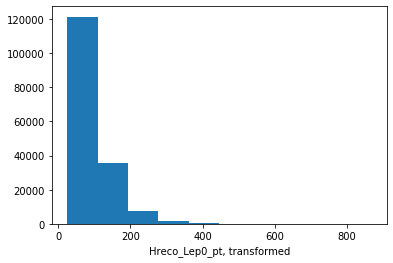

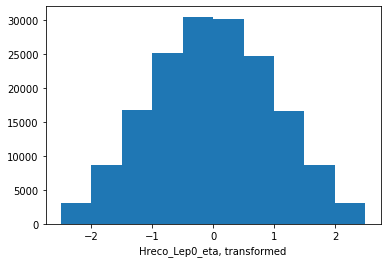

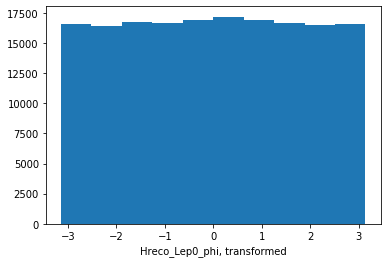

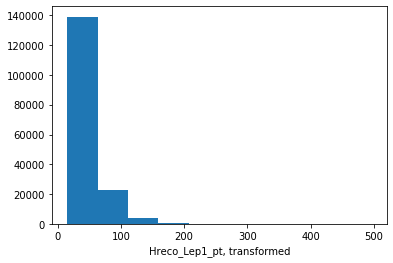

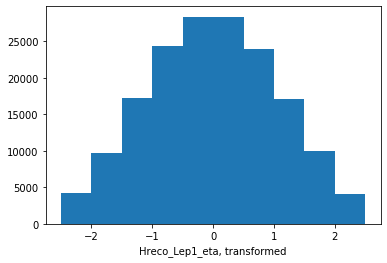

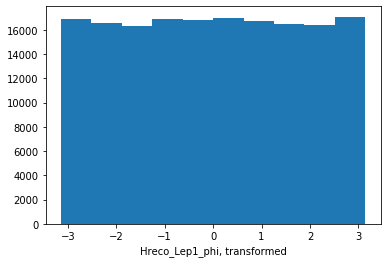

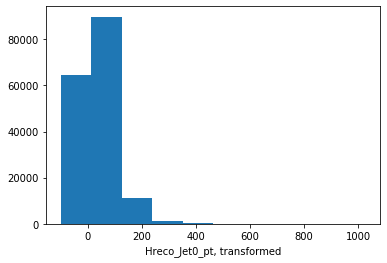

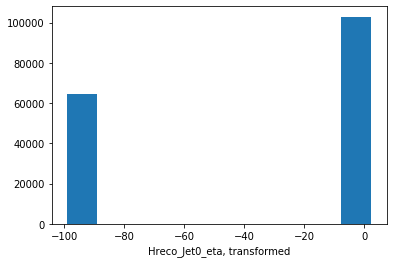

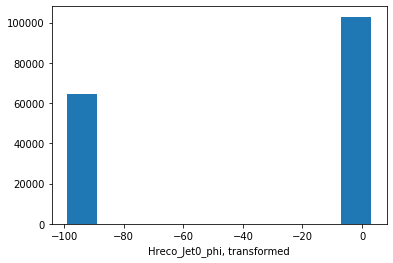

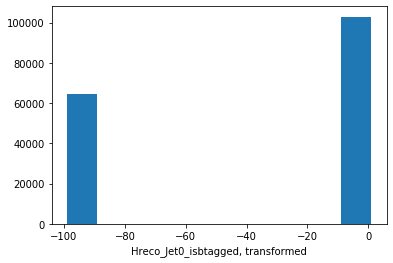

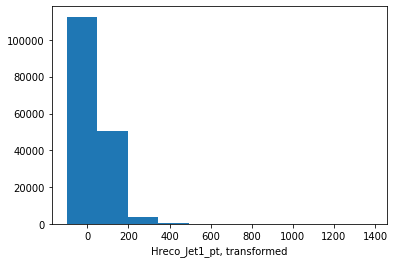

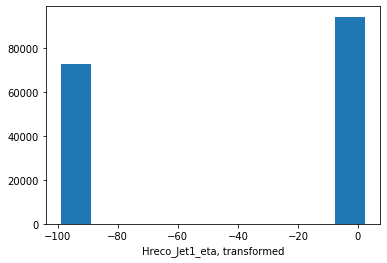

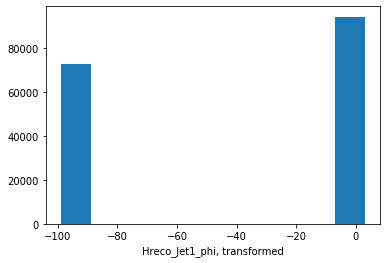

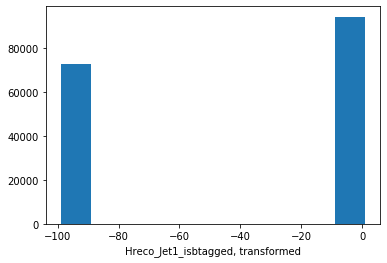

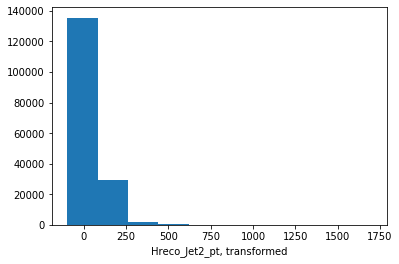

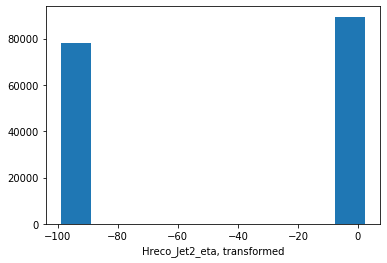

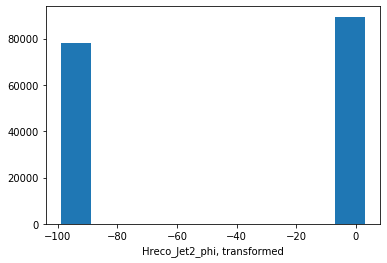

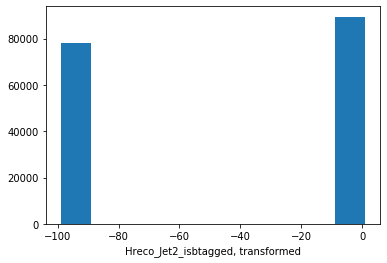

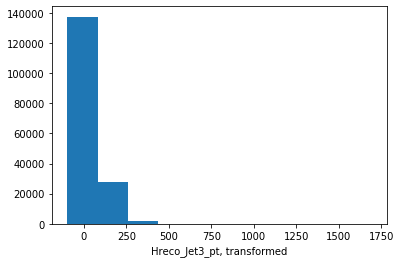

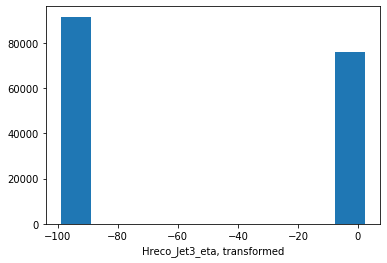

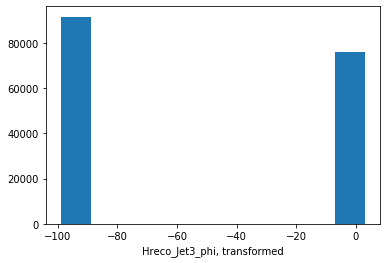

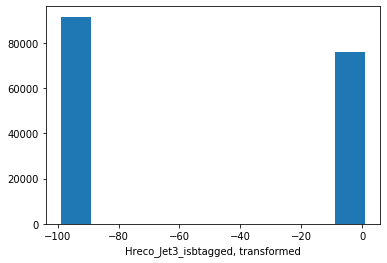

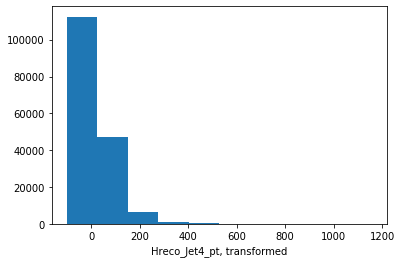

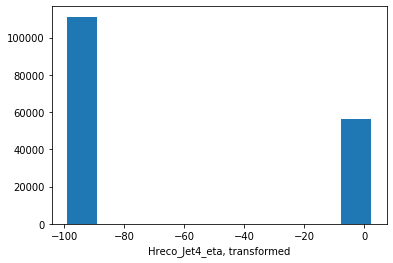

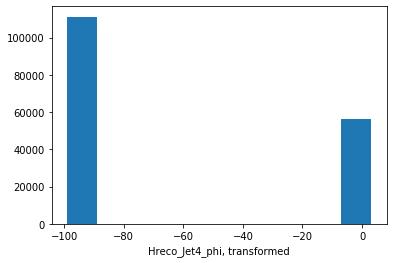

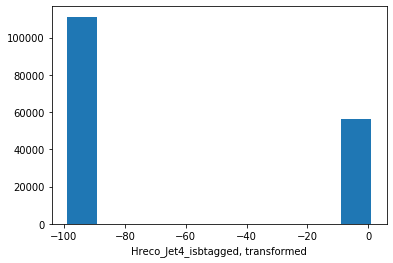

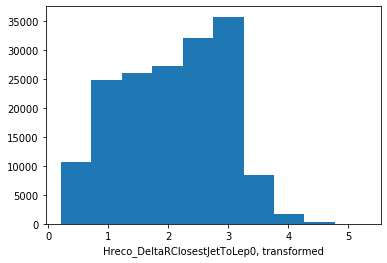

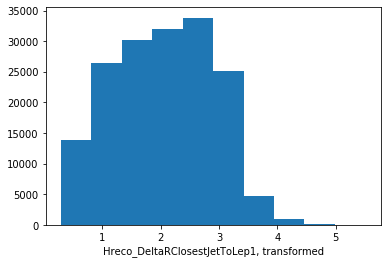

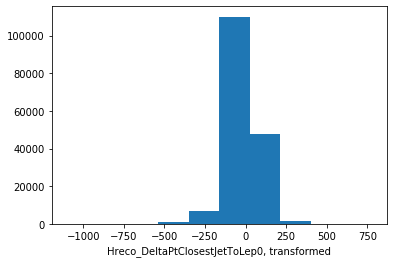

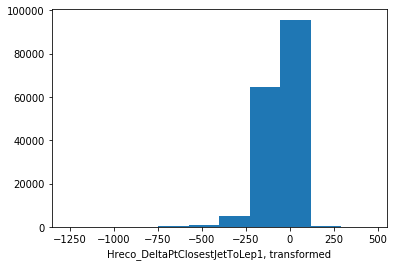

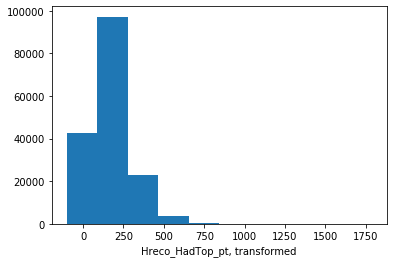

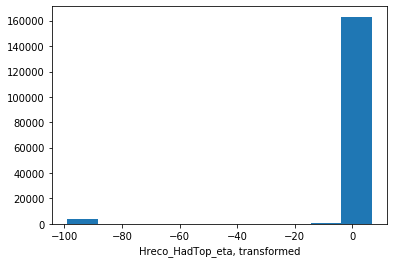

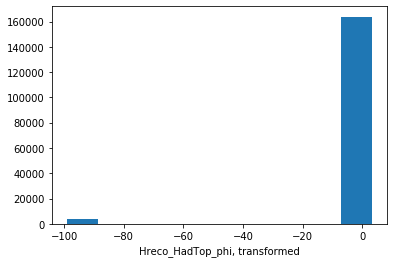

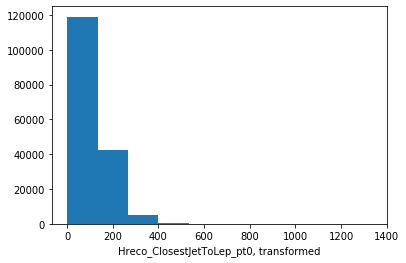

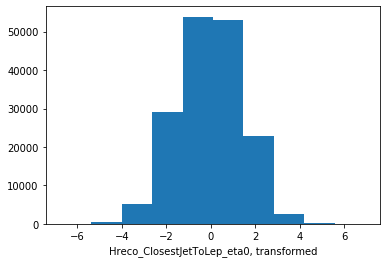

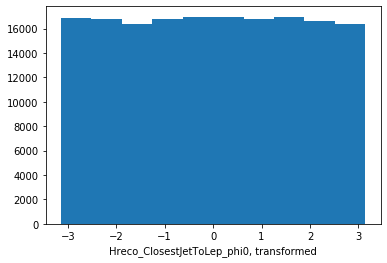

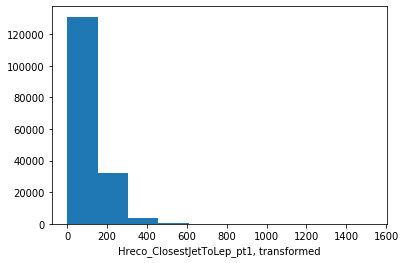

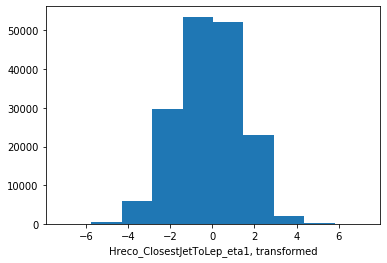

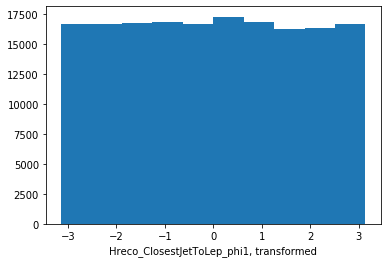

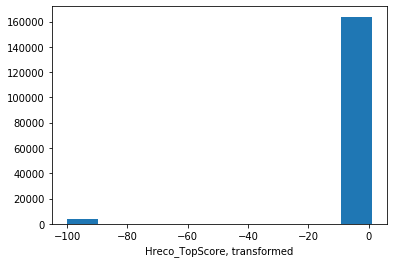

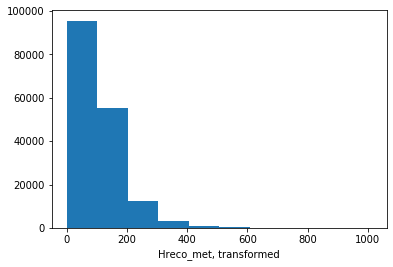

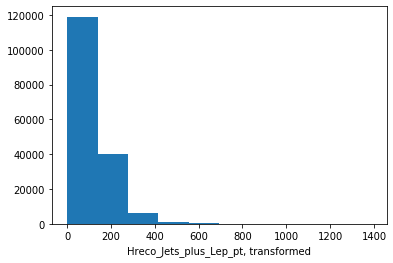

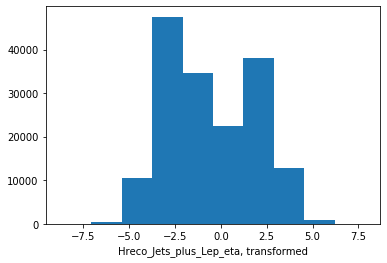

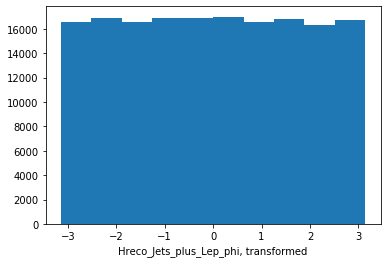

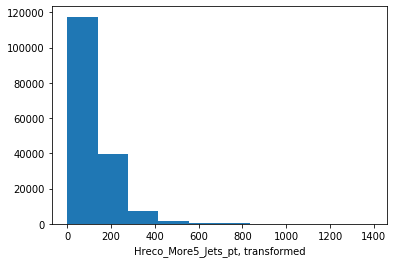

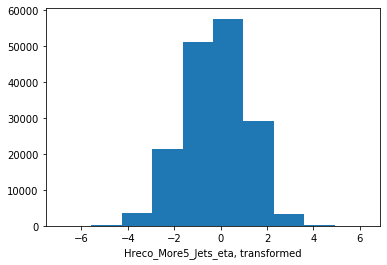

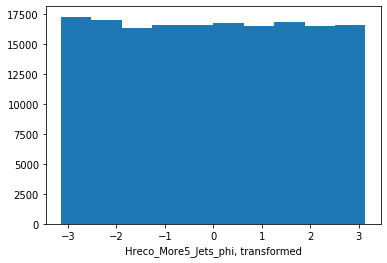

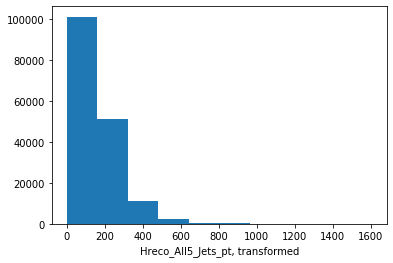

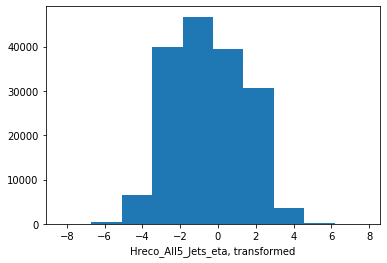

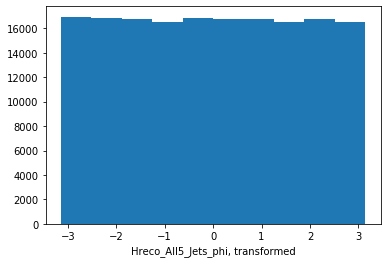

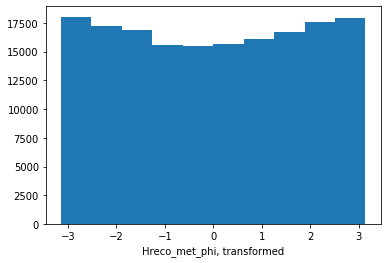

Now plotting training target
(167316, 1)


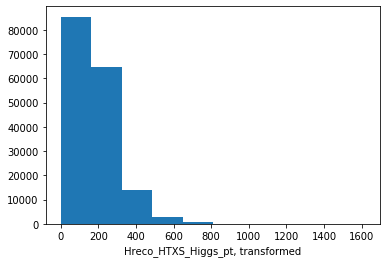

End. I use 51 variables


In [24]:
if(event_tails):
    x_train, x_test, y_train, y_test = train_test_split(data_tth_more_data[thevars], data_tth_more_data[target], random_state=7, test_size=0.2,)

    _, x_test_base, _, y_test_base = train_test_split(data_tth[thevars], data_tth[target], random_state=7, test_size=0.2,)
else:
    x_train, x_test, y_train, y_test = train_test_split(data_tth[thevars], data_tth[target], random_state=7, test_size=0.3,)


viz=False
plots=True
preprocess=False

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
print(x_train.shape)
if(preprocess):
    print('Scaling training features')
    scaler = StandardScaler()
    scaler.fit(x_train.values)
    print('Transforming training and validation features')
    x_train_scaled = scaler.transform(x_train.values)
    x_test_scaled = scaler.transform(x_test.values)
    print('Plotting transformed features for the training set')
    if viz:
        myviz=pd.DataFrame(x_train_scaled,columns=data_tth[thevars].columns)
        myviz_short=myviz.head(100)
        sns.pairplot(myviz_short[thevars[:10]], diag_kind="kde")
        plt.show()
if(plots):
    for var in thevars:
        plt.hist(x_train[var])
        plt.xlabel('%s, transformed'%var)
        plt.show()
    for var in target:
        print('Now plotting training target')
        print(y_train.shape)
        plt.hist(y_train[var])
        plt.xlabel('%s, transformed'%var)
        plt.show()
    print('End. I use %s variables'%len(thevars))

In [25]:
# The model

def my_model(lr=5e-2):#(lr=5e-2):
    model = Sequential()

    model.add(Dense(9*len(thevars), input_dim=len(thevars), kernel_initializer='he_normal', kernel_regularizer='l2') )#TruncatedNormal'))
    #model.add(BatchNormalization())
    #model.add(Dropout(0.2, input_shape=(len(thevars),))) # 20% dropout for input features
    for Nnodes in [7*len(thevars),6*len(thevars),len(thevars),int(len(thevars)/2)]:
        #model.add(BatchNormalization())
        model.add(Dense(Nnodes, activation='selu', kernel_initializer='random_uniform', kernel_regularizer='l2'))
        #model.add(PReLU())
        #model.add(Activation('elu'))
        model.add(Dropout(0.2))
    #model.add(BatchNormalization())
    model.add(Dense(1, kernel_initializer='he_normal'))
    model.add(Activation('elu'))
    
    adam = optimizers.Adam(lr=lr,amsgrad=True) 
    #model.compile(loss='mean_absolute_percentage_error', optimizer=adam, metrics=['mse'])
    #model.compile(loss='mean_absolute_error', optimizer=adam)
    model.compile(loss='mean_squared_error', optimizer=adam, metrics=['mse'])
    #model.compile(loss='mean_squared_logarithmic_error', optimizer='adam', metrics=['mse']) # logerror good if target range is vast
    #model.compile(loss='mean_absolute_error', optimizer=adam, metrics=['mse']) # logerror good if target range is vast
    return model


def my_training(lr,epochs=20):
    my_regression = KerasRegressor(
        build_fn=my_model, 
        epochs=epochs, 
        batch_size=821,#256 #521
        verbose=2,
        lr=lr
)
    cb_list = [PlotLossesKeras()]
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,min_delta=0.0001)
    earlyStopping=True
    if earlyStopping:
        cb_list.append(es)
    history = my_regression.fit(
       x_train if not preprocess else x_train_scaled, 
       y_train,
    validation_data=(
          x_test if not preprocess else x_test_scaled, 
          y_test
   ),
        #validation_split = 0.1,
        #callbacks=cb_list
     )
    print(x_train.shape)
    print(y_train.shape)
    return my_regression, history


In [26]:
model, hist= my_training(1e-4,epochs=30)#-4 50
plt.show()


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 167316 samples, validate on 41829 samples
Epoch 1/30
 - 6s - loss: 13881.1922 - mean_squared_error: 13869.7002 - val_loss: 8570.1427 - val_mean_squared_error: 8558.6599
Epoch 2/30
 - 5s - loss: 9627.0695 - mean_squared_error: 9615.5976 - val_loss: 8422.4102 - val_mean_squared_error: 8410.9514
Epoch 3/30
 - 5s - loss: 9382.3190 - mean_squared_error: 9370.8693 - val_loss: 8169.7800 - val_mean_squared_error: 8158.3384
Epoch 4/30
 - 5s - loss: 9165.1247 - mean_squared_error: 9153.6888 - val_loss: 8141.0902 - val_mean_squared_error: 8129.6592
Epoch 5/30
 - 5s - loss: 9087.0597 - mean_squared_error: 9075.6345 - val_loss: 8011.4838 - val_mean_squared_error: 8000.0649
Epoch 6/30
 - 5s - loss: 8995.1194 - mean_squared_error: 8983.7042 - val_loss: 8173.537

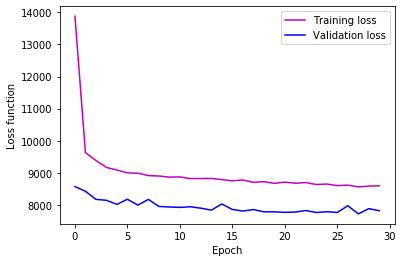

In [27]:
plt.plot(hist.history['loss'],color='m',label='Training loss')
plt.plot(hist.history['val_loss'],color='b',label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss function')
plt.legend(loc='upper right')
plt.savefig('plots/2016_training_validation.pdf')
plt.show()

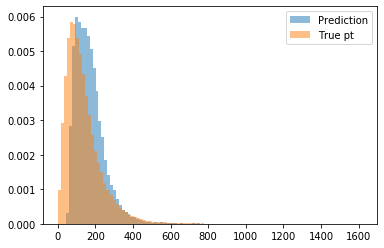

In [30]:
import seaborn as sns

viz_x_test = x_test if not preprocess else x_test_scaled
viz_x_test=pd.DataFrame(viz_x_test,columns=data_tth[thevars].columns)
prediction = model.predict(viz_x_test.values)


np.reshape(prediction,(prediction.shape[0],1))
if(event_tails):
    plt.hist(prediction-50,alpha=0.5,log=False,bins=100,label='Prediction', density=True)
    plt.hist(data_tth[target].values,alpha=0.5,log=False,bins=100,label='True pt', density=True)#y_test
    plt.legend(loc='upper right')
else:
    plt.hist(prediction,alpha=0.5,log=False,bins=100,label='Prediction', density=True)
    plt.hist(data_tth[target].values,alpha=0.5,log=False,bins=100,label='True pt', density=True)#y_test
    plt.legend(loc='upper right')   
#plt.show()
plt.savefig('plots/2016_2lss_pred_vs_true.pdf')
plt.show()


(30270, 51)
        Hreco_HTXS_Higgs_pt
134560            67.238280
28487             61.736330
3707              17.977540
18767             65.347660
75845            221.304690
...                     ...
19777             94.136720
46609             98.449220
57988            257.453120
59114             39.658203
81806            143.820310

[41829 rows x 1 columns]
35235     0
117014    1
71750     1
27899     1
54190     1
         ..
81        2
131767    0
50381     0
121054    1
129718    0
Name: Hreco_HTXS_Higgs_pt, Length: 30270, dtype: int64


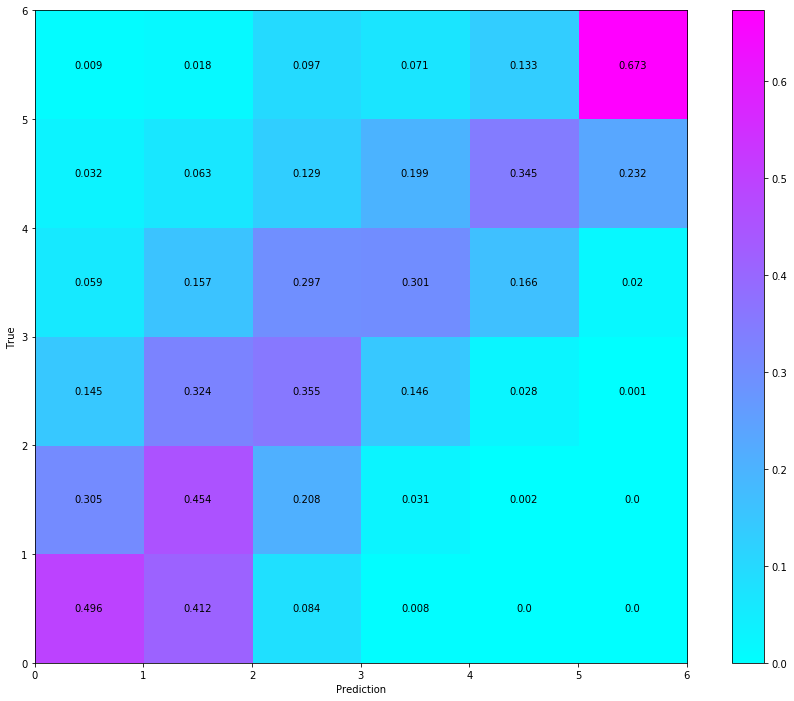

In [31]:
if(event_tails):
    pred = model.predict(x_test_base.values)
    print(x_test_base.shape)
else:
    pred = model.predict(x_test.values)
    
def catfrompt(pt):
    if pt<60:
        return 0
    if pt<120:
        return 1
    if pt<200:
        return 2
    if pt<300:
        return 3
    if pt<450:
        return 4
    return 5

# Categorical target
print(y_test)
from copy import deepcopy

ytest=deepcopy(y_test_base)
ytest['Hreco_HTXS_Higgs_pt']= ytest['Hreco_HTXS_Higgs_pt'].apply(lambda x: catfrompt(x))
#print(ytest.shape)
print(ytest['Hreco_HTXS_Higgs_pt'])

predicted=[ catfrompt(i) for i in pred]

response, _, _ = np.histogram2d(predicted, ytest['Hreco_HTXS_Higgs_pt'], bins=[np.linspace(0,6,7),np.linspace(0,6,7)])                                                                                                                                                                                                                                   
#response, _, _ = np.histogram2d(predicted, data_tth[target].values, bins=[np.linspace(0,4,5),np.linspace(0,4,5)])                                                                                                                                                                                                                                   

sum_of_rows = response.sum(axis=1)
norm_response = response / sum_of_rows[:, np.newaxis]

fig = plt.figure(figsize=(16, 12))
ax2 = fig.add_subplot(111)
size=6
x_start = 0.0
x_end = 6.0
y_start = 0.0
y_end = 6.0
extent = [x_start, x_end, y_start, y_end]
im=ax2.imshow(norm_response,extent=extent,origin="lower",interpolation='None',cmap="cool")
ax2.set_xlabel("Prediction")
ax2.set_ylabel("True")


# Add the text
jump_x = (x_end - x_start) / (2.0 * size)
jump_y = (y_end - y_start) / (2.0 * size)
x_positions = np.linspace(start=x_start, stop=x_end, num=size, endpoint=False)
y_positions = np.linspace(start=y_start, stop=y_end, num=size, endpoint=False)

for y_index, y in enumerate(y_positions):
    for x_index, x in enumerate(x_positions):
        label = round(norm_response[y_index, x_index],3)
        text_x = x + jump_x
        text_y = y + jump_y
        ax2.text(text_x, text_y, label, color='black', ha='center', va='center')

fig.colorbar(im)
#plt.show()
plt.savefig('plots/2016_2lss_corr.pdf')